In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv('sales_data1.csv', encoding='ISO-8859-1')

In [9]:
print(df.head())
print(df.info())

         Date  Open  High  Low  Close  Adj Close  Volume
0  2006-06-30   NaN   NaN  NaN    NaN        NaN     NaN
1  2007-07-05   NaN   NaN  NaN    NaN        NaN     NaN
2  2007-08-27   NaN   NaN  NaN    NaN        NaN     NaN
3  2008-07-07   NaN   NaN  NaN    NaN        NaN     NaN
4  2009-07-09   NaN   NaN  NaN    NaN        NaN     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1963 non-null   object 
 1   Open       1956 non-null   float64
 2   High       1956 non-null   float64
 3   Low        1956 non-null   float64
 4   Close      1956 non-null   float64
 5   Adj Close  1956 non-null   float64
 6   Volume     1956 non-null   float64
dtypes: float64(6), object(1)
memory usage: 107.5+ KB
None


In [19]:
# Clean the column names (if necessary)
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

# Select the correct features, ensuring there are no extra spaces
features = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Drop rows with any missing values
features = features.dropna()

# Scale the remaining numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# If you want to keep the Date, convert it first or process separately
# Uncomment the next line to convert Date to timestamps if needed
# df['Date'] = pd.to_datetime(df['Date']).astype(int) / 10**9  # Convert to seconds since epoch


C:\androidst\anainstalled\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\androidst\anainstalled\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\androidst\anainstalled\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\androidst\anainstalled\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

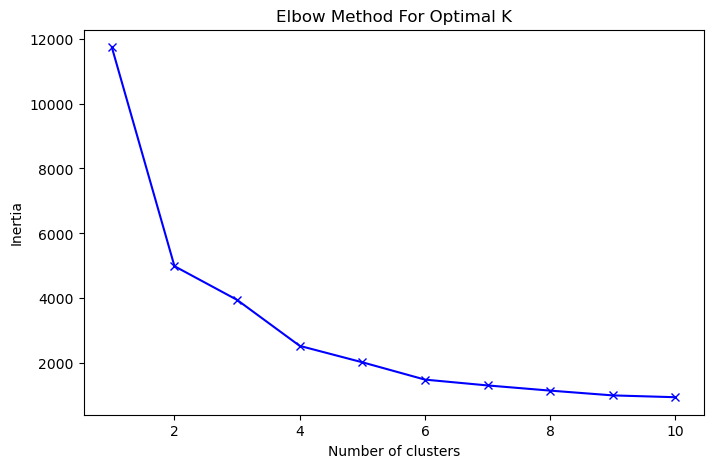

In [23]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [27]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_
print(df['Cluster'].value_counts())

C:\androidst\anainstalled\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


ValueError: Length of values (1956) does not match length of index (1963)